In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Inportando o arquivo CSV com os dados
df = pd.read_csv('C:/Users/lucas/Downloads/mediasDiarias_modificado.csv')

# Visualizar as primeiras linhas do dataframe
print(df.head())


         Data  PRECIPITAÇÃO TOTAL, HORÁRIO (mm)  \
0  2017-01-01                                 0   
1  2017-01-02                                 0   
2  2017-01-03                                 0   
3  2017-01-04                                 0   
4  2017-01-05                                 0   

   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  \
0                                                882       
1                                                880       
2                                                880       
3                                                881       
4                                                882       

   RADIACAO GLOBAL (Kj/m²)  TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)  \
0                      197                                          23.0   
1                      167                                          24.0   
2                      174                                          23.0   
3                      182  

In [3]:
# Verificar se há valores ausentes
print(df.isnull().sum())

##Documentar que o resultado obtido foi excluindo os valores faltantes
# Tratar valores ausentes
df = df.dropna()

# Converter a coluna 'Data' para o formato datetime
df['Data'] = pd.to_datetime(df['Data'])

Data                                                      0
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                          0
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)     0
RADIACAO GLOBAL (Kj/m²)                                   0
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)              5
TEMPERATURA DO PONTO DE ORVALHO (°C)                     26
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                 26
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                 26
UMIDADE RELATIVA DO AR, HORARIA (%)                      21
VENTO, RAJADA MAXIMA (m/s)                                0
VENTO, VELOCIDADE HORARIA (m/s)                           0
dtype: int64


In [4]:
# Selecionar as features (variáveis independentes) e o target (variável dependente)
X = df[['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 
        'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)', 
        'RADIACAO GLOBAL (Kj/m²)', 
        'TEMPERATURA DO PONTO DE ORVALHO (°C)', 
        'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)', 
        'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)', 
        'UMIDADE RELATIVA DO AR, HORARIA (%)', 
        'VENTO, RAJADA MAXIMA (m/s)', 
        'VENTO, VELOCIDADE HORARIA (m/s)']]
y = df['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#Modelo de regressão linear
model = LinearRegression()
#Treinamento com os dados de treino
model.fit(X_train, y_train)

LinearRegression()

In [7]:
#Previsões com os dados de teste
y_pred = model.predict(X_test)

In [8]:
#Calculando o erro quadratico
mse = mean_squared_error(y_test, y_pred)
#Calculando a raiz quadrada do erro quadradico
rmse = np.sqrt(mse)
print(f'Erro quadrático médio: {mse}')
print(f'Raiz do erro quadrático médio: {rmse}')
##Trazer o significado do erro quadratico


Erro quadrático médio: 0.9856148491980409
Raiz do erro quadrático médio: 0.9927813702915869


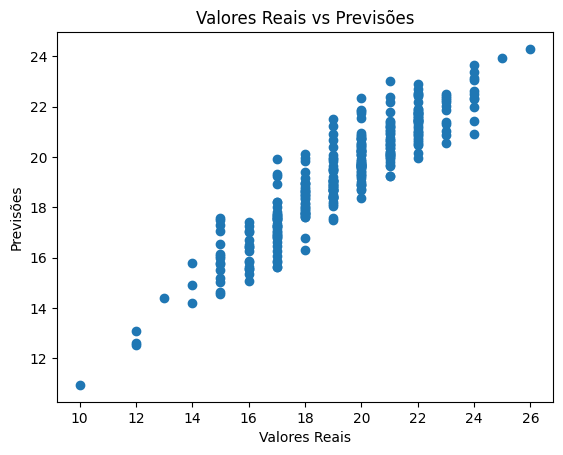

In [9]:
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Valores Reais vs Previsões')
plt.show()

In [10]:
def prever_intervalo_temperatura(model, X, y, novos_dados, intervalo=0.95):
    # Adiciona a interceptação (bias) aos novos dados
    novos_dados = np.array(novos_dados).reshape(1, -1)
    
    # Faz a previsão
    previsoes = model.predict(novos_dados)
    
    # Número de amostras de treino
    n = len(X)
    
    # Número de features
    p = X.shape[1]
    
    # Intervalo de confiança
    alpha = 1 - intervalo
    
    # Fazer previsões no conjunto de treinamento para calcular os resíduos
    y_train_pred = model.predict(X)
    residuos = y - y_train_pred
    
    # Calcular a variância dos resíduos
    residuo_variancia = np.var(residuos, ddof=p)
    
    # Calcular a matriz de projeção
    X_b = np.c_[np.ones((n, 1)), X]
    X_new_b = np.c_[np.ones((1, 1)), novos_dados]
    hat_matrix = X_new_b.dot(np.linalg.inv(X_b.T.dot(X_b)).dot(X_new_b.T))
    
    # Calcular a margem de erro
    margem_erro = stats.t.ppf(1 - alpha / 2, n - p - 1) * np.sqrt(residuo_variancia * (1 + hat_matrix))
    
    intervalo_inferior = previsoes - margem_erro
    intervalo_superior = previsoes + margem_erro
    
    return intervalo_inferior[0], previsoes[0], intervalo_superior[0]

In [12]:
#Sequência dos Dados
##PRECIPITAÇÃO TOTAL, HORÁRIO (mm)
##PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)
##RADIACAO GLOBAL (Kj/m²)
##TEMPERATURA DO PONTO DE ORVALHO (°C)
##UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)
##UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)
##UMIDADE RELATIVA DO AR, HORARIA (%)
##VENTO, RAJADA MAXIMA (m/s)
##VENTO, VELOCIDADE HORARIA (m/s)

# Exemplo de uso da função
novos_dados = [0, 882, 197, 14, 6, 5, 5, 8, 4]
intervalo_inferior, previsao, intervalo_superior = prever_intervalo_temperatura(model, X_train, y_train, novos_dados)
print(f'Intervalo de Temperatura: ({intervalo_inferior}, {previsao}, {intervalo_superior})')

Intervalo de Temperatura: ([20.44467997], 22.389691780566125, [24.33470359])


c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
